In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
data = pd.read_csv('Mall_Customers.csv')
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [67]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [68]:
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


 The CustomerID is a unique identifier and does not provide meaningful information for clustering. It should not influence the clustering algorithm

In [69]:
data = data.drop('CustomerID', axis=1)

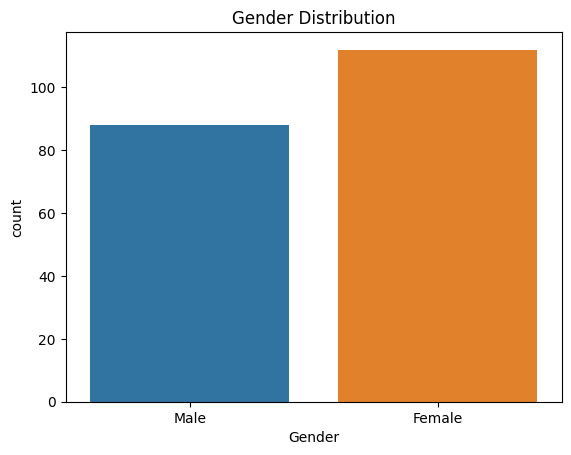

In [70]:
# Gender distribution
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

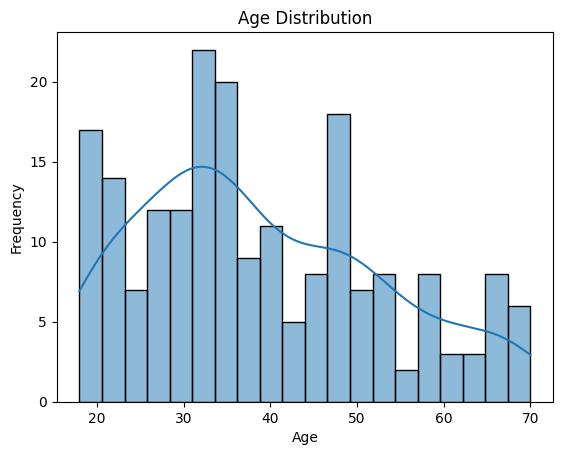

In [71]:
# Age distribution
sns.histplot(data['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

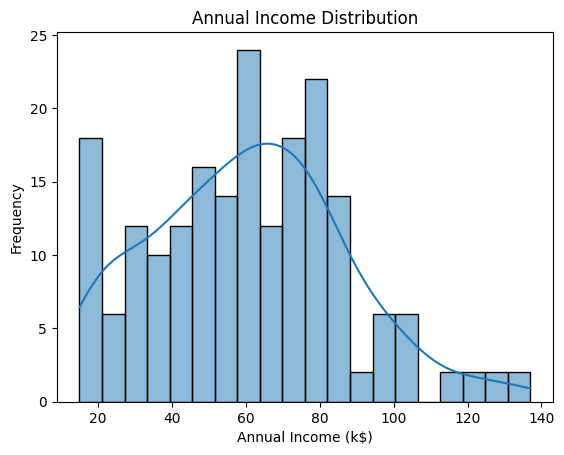

In [72]:
sns.histplot(data['Annual Income (k$)'], kde=True, bins=20)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

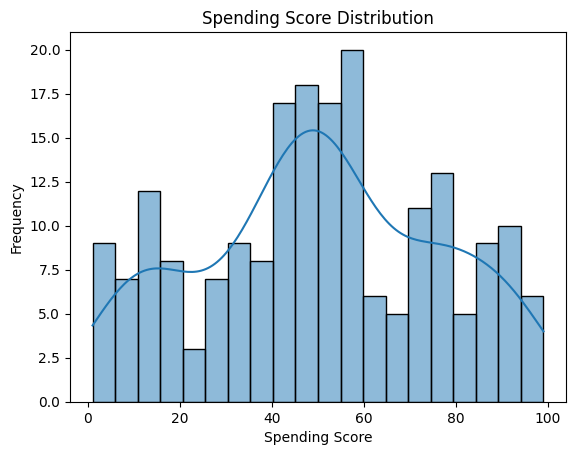

In [73]:
# Spending Score distribution
sns.histplot(data['Spending Score (1-100)'], kde=True, bins=20)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

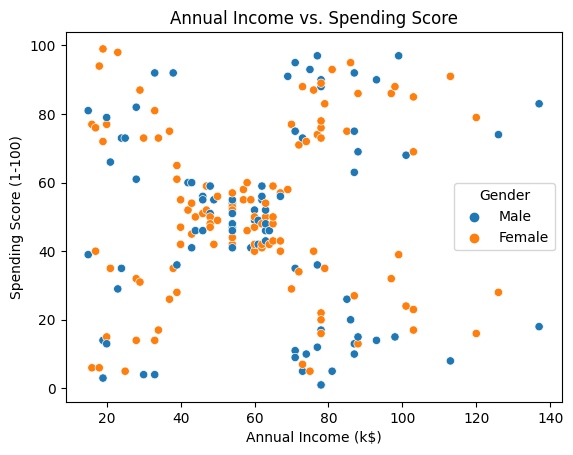

In [74]:
# Scatter plot of Annual Income vs. Spending Score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

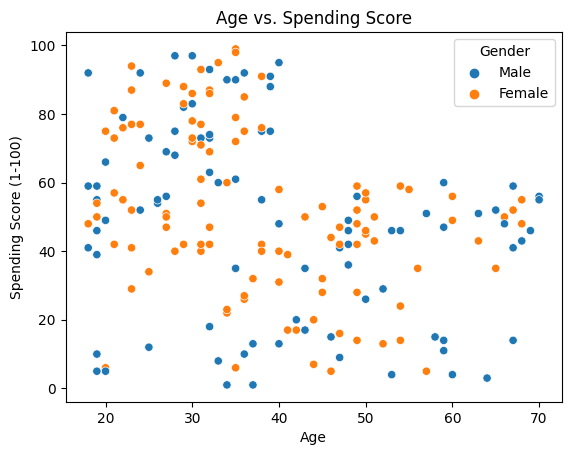

In [75]:
# Scatter plot of Age vs. Spending Score
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title('Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

Encoding Gender

In [76]:
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

Standardizing Age, Annual Income, Spending Score

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(
    data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
)

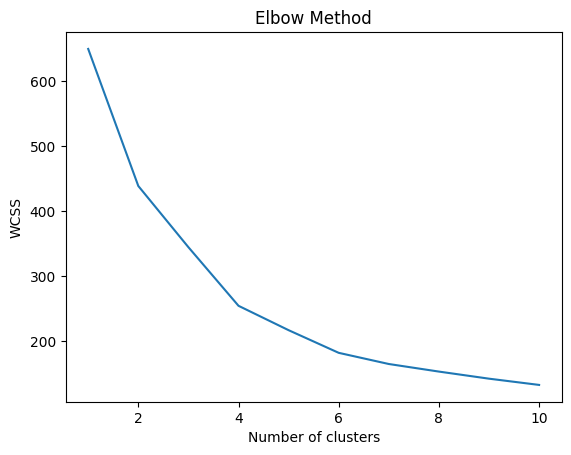

In [78]:
# Elbow Method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):  # Checking for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()


In [79]:
# Apply K-means with the optimal number of clusters (assume 5 here)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(data)

# Add the cluster labels to the original dataframe
data['Cluster'] = clusters


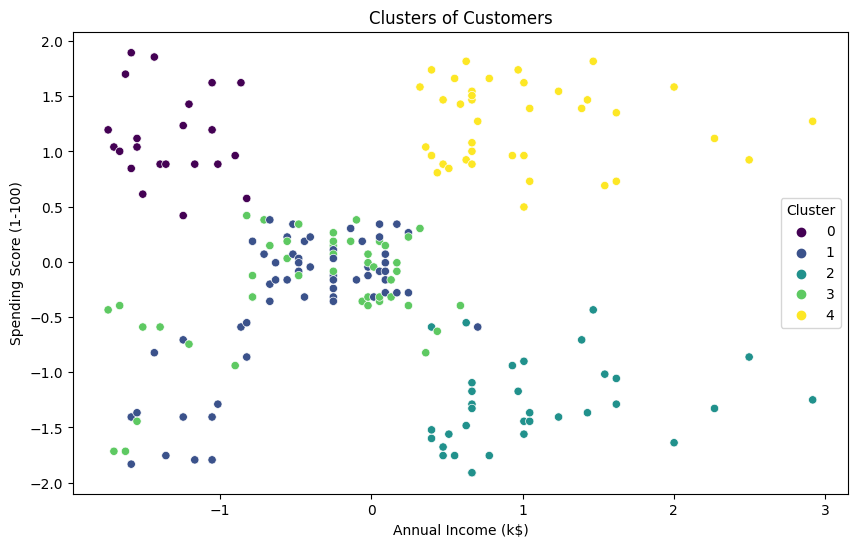

In [80]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


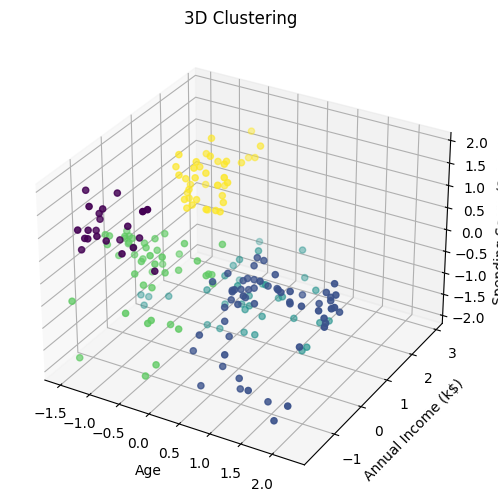

In [81]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
ax.set_title('3D Clustering')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()


In [82]:
# Analyzing the clusters
cluster_analysis = data.groupby('Cluster').mean()
print(cluster_analysis)

              Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
Cluster                                                                   
0       -0.974396           -1.329545                1.132178     0.409091
1        1.198627           -0.460981               -0.327038     0.431034
2        0.173295            1.066454               -1.298010     0.588235
3       -0.781722           -0.403069               -0.215914     0.340426
4       -0.441917            0.991583                1.239503     0.461538


```Cluster 0:

Age: The customers in this cluster are relatively younger (-0.97 on a normalized scale).
Annual Income: They have a lower annual income (-1.33 on a normalized scale).
Spending Score: These customers have a high spending score (1.13 on a normalized scale), indicating that they tend to spend more despite having lower income.
Gender: Around 41% of this cluster is male.
Marketing Strategy: This group is an ideal target for promotions and discounts, as they are younger and tend to spend more even with lower income. Offering loyalty programs, discounts, and personalized marketing could be effective.
Cluster 1:

Age: This cluster contains older customers (1.20 on a normalized scale).
Annual Income: They have a moderate-to-low annual income (-0.46 on a normalized scale).
Spending Score: These customers have a lower spending score (-0.33 on a normalized scale), suggesting they are more cautious with their spending.
Gender: About 43% of this cluster is male.
Marketing Strategy: Since these customers are older and spend less, they might appreciate value-driven promotions, such as senior discounts or promotions on essential items. Emphasizing quality and reliability might also appeal to them.
Cluster 2:

Age: This cluster has customers of moderate age (0.17 on a normalized scale).
Annual Income: These customers have a high annual income (1.07 on a normalized scale).
Spending Score: They have a low spending score (-1.30 on a normalized scale), indicating they are very conservative with their spending.
Gender: About 59% of this cluster is male.
Marketing Strategy: Despite having a high income, these customers do not spend much, possibly due to careful budgeting. High-end promotions or luxury items might appeal to them, but the marketing approach should highlight value for money, exclusivity, and investment in quality.
Cluster 3:

Age: Customers in this cluster are slightly younger (-0.78 on a normalized scale).
Annual Income: They have a moderate annual income (-0.40 on a normalized scale).
Spending Score: Their spending score is slightly below average (-0.22 on a normalized scale).
Gender: Around 34% of this cluster is male.
Marketing Strategy: This group may benefit from targeted promotions that highlight affordability and utility. Since they are younger, tech-savvy marketing strategies (like social media campaigns) might be effective in reaching them.
Cluster 4:

Age: These customers are relatively older (-0.44 on a normalized scale).
Annual Income: They have a high annual income (0.99 on a normalized scale).
Spending Score: They also have a high spending score (1.24 on a normalized scale).
Gender: About 46% of this cluster is male.
Marketing Strategy: This cluster is potentially the most lucrative, as they have both high income and high spending scores. Premium products, exclusive offers, and luxury goods might appeal to this group. Personalized marketing that highlights their status and exclusive access to high-end products could be highly effective.
Key Target Customer Groups:
Cluster 4: High income and high spending score. These customers are the most likely to respond to premium marketing strategies.
Cluster 0: Younger customers with a high spending score despite lower income. They might respond well to promotional offers and discounts.

```

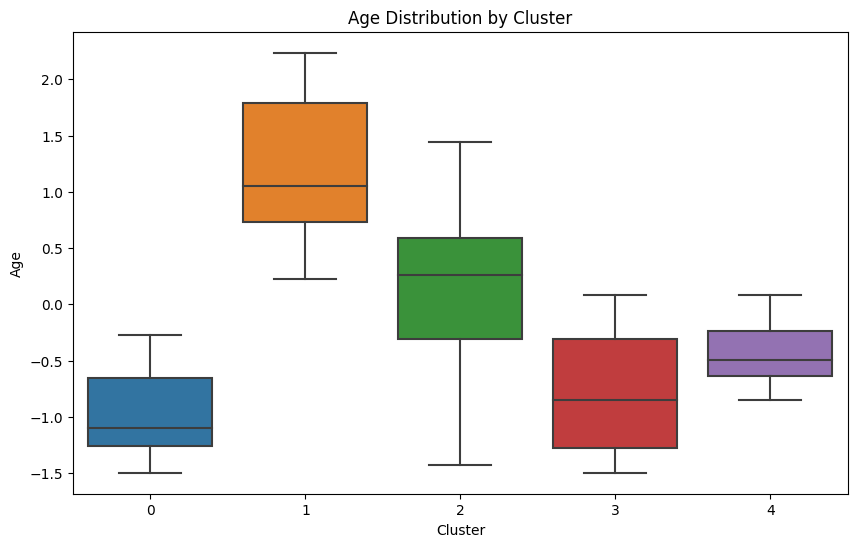

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of Age distribution in each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=data)
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()


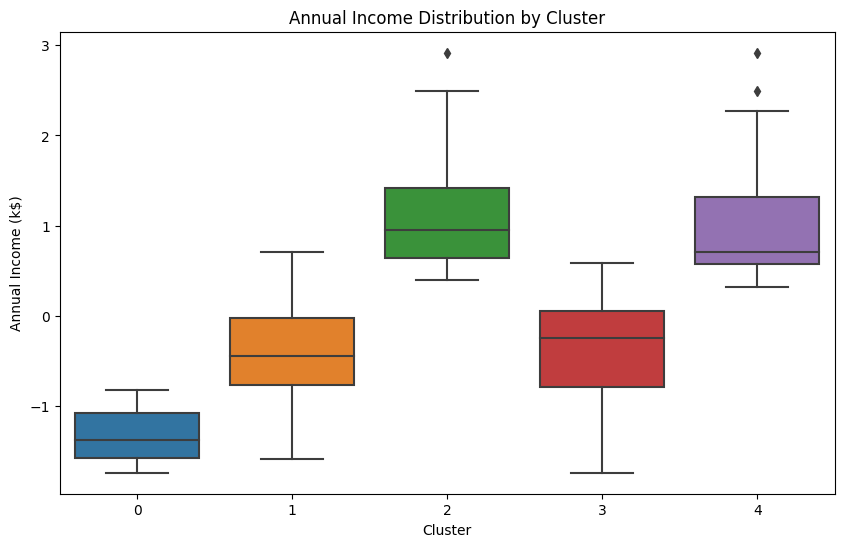

In [85]:
# Boxplot of Annual Income distribution in each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=data)
plt.title('Annual Income Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Annual Income (k$)')
plt.show()

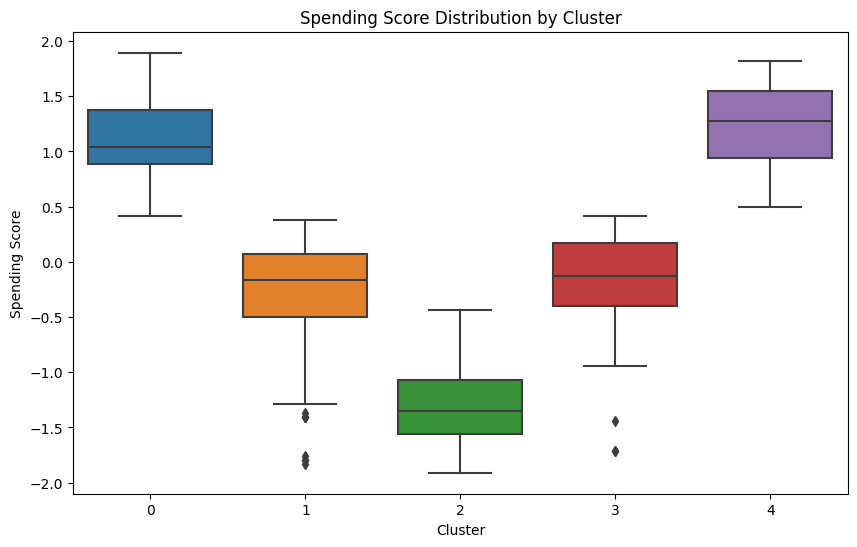

In [90]:
# Boxplot of Spending Score distribution in each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=data)
plt.title('Spending Score Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending Score')
plt.show()